# Visualizing a spin 1 state on a Bloch Sphere

The steps below show how to visualize a spin 1 state density matrix on a Bloch sphere. 
We first create spin 1 states with m_s = 0 and m_s = +1. We then show how to use nvmodesl.utilities.qutritdm_to_qubitket to project to m_s = 0 -- |0> and m_s = +1 -- |1>

Then we plot these two kets. 

In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import qutip

In [29]:
import nvmodels

In [30]:
# Our NV center model produces a Hamiltonian with quantum numbers for the spin states of the electrons
# and nitrogen nucleus. For 14N with spin I = 1, this is a two-qutrit system. 
# We typically want to visualize the state of the electron because when working with NV centers,
# we often isolate a m_s = 0 to m_s = 1 or m_s = -1 transition through an applied static magnetic field (Zeeman
# effect) in order to create a qubit between two states. 
# Experimenters then often apply MW fields to transisition state from m_s = 0 to the isolated
# spin state. For example, we may want to use the m_s = 0 and m_s = -1 states as our qubit. 

# let's start with |0, 0> # electron m_s = 0, nitrogen m_i = 0

psi_00 = qutip.tensor(qutip.basis(3,1), qutip.basis(3,1))
rho_00 = qutip.ket2dm(psi_00)

In [31]:
psi_00

Quantum object: dims = [[3, 3], [1, 1]], shape = (9, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [32]:
rho_00

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

In [33]:
# We need to project this to a 2-level state. 

# First, we select just the electron subspace of this bipartite system

In [34]:
electron = rho_00.ptrace(0)

In [35]:
electron

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]

In [36]:
# Now, we must choose if we want to isolate the |m_s = +1> or  |m_s = -1> state to represent our |1> qubit state.
# Let's choose |m_s = +1> = |1>. 
# That is we want our two-level system to be between |m_s = +1>  and |m_s = 0>
# If we want the +1 0 state, set plus_zero = True in the following utility function

nvmodels.utilities.qutritdm_to_qubitket(electron, plus_zero = True)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [37]:
# Note that the |0> state is represented similarly to the |spin up> state of a spin 1/2 system, as 
# is consistent with qutip convention

In [38]:
# we get the same result, of course, if we use the |0> - |-1> subspace
nvmodels.utilities.qutritdm_to_qubitket(electron, plus_zero = False)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [39]:
# Now consider an NV state where the electron is in m_s = +1 and the nitrogen is in m_i = 0

In [40]:
# electron m_s = +1, nitrogen m_i = 0
psi_10 = qutip.tensor(qutip.basis(3,0), qutip.basis(3,1))
rho_10 = qutip.ket2dm(psi_10)

In [41]:
rho_10

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

In [42]:
electron = rho_10.ptrace(0)

In [43]:
electron

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

In [44]:
# we now have m_s = +1, which we can represent as |1>

nvmodels.utilities.qutritdm_to_qubitket(electron, plus_zero = True)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [45]:
# note that if we use plus_zero = False, we get an empty state!  This is because we have m_s = +1, but 
# plus_zero = False selects the m_s=0 - m_s=-1 subspace

nvmodels.utilities.qutritdm_to_qubitket(electron, plus_zero = False)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [0.]]

In [48]:
# we select our two kets from two different electron-nitrogen bipartite systems where 
# is ket_0 an electron in the m_s = 0 state and ket_1 is an electron in the m_s = 1 state

# we also introduce the N_qutritdm_to_qubitket function which does the partial trace to the subsystem of interest

ket_0 = nvmodels.utilities.N_qutritdm_to_qubitket(rho_00, 0, plus_zero = True)
ket_1 = nvmodels.utilities.N_qutritdm_to_qubitket(rho_10, 0, plus_zero = True)

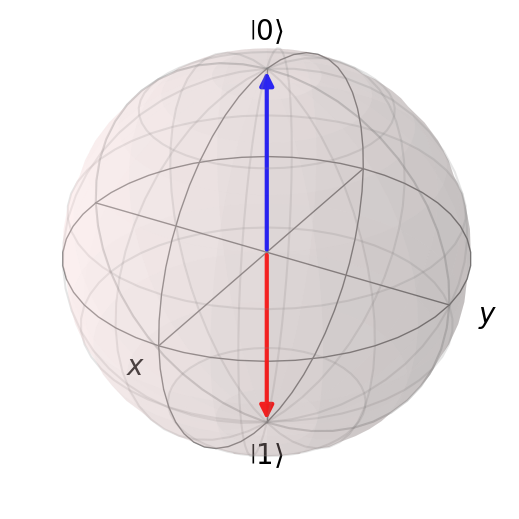

In [49]:
bloch = qutip.Bloch()
bloch.vector_color = ["b", "r"] 
bloch.add_states([ket_0, ket_1])
bloch.show()